# Part 2.b

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)
import warnings
warnings.filterwarnings('ignore')

### Concatenate the data into 1 dataframe for the remainder of the analysis.

In [2]:
year_2000 = pd.read_csv('Data/final_tmdb_data_2000.csv.gz')
year_2001 = pd.read_csv('Data/final_tmdb_data_2001.csv.gz')

In [3]:
df = pd.concat([year_2000, year_2001])
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.271,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,2.345,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.376,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,25.446,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.119,2202.0,PG


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2570 entries, 0 to 1332
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   imdb_id                2570 non-null   object 
 1   adult                  2568 non-null   float64
 2   backdrop_path          1400 non-null   object 
 3   belongs_to_collection  205 non-null    object 
 4   budget                 2568 non-null   float64
 5   genres                 2568 non-null   object 
 6   homepage               172 non-null    object 
 7   id                     2568 non-null   float64
 8   original_language      2568 non-null   object 
 9   original_title         2568 non-null   object 
 10  overview               2518 non-null   object 
 11  popularity             2568 non-null   float64
 12  poster_path            2310 non-null   object 
 13  production_companies   2568 non-null   object 
 14  production_countries   2568 non-null   object 
 15  rele

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)

### How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

In [7]:
# budget = df['budget'] > 0
# revenue = df['revenue'] > 0
# financial_filter = df.loc[budget | revenue]
filter_financial = (df['budget'] > 0) | (df['revenue']>0)
filter_financial.value_counts()

False    1932
True      637
dtype: int64

In [8]:
len(filter_financial)

2569

In [9]:
df['Profit'] = df['revenue'] - df['budget']
print(df)

        imdb_id  adult                     backdrop_path  \
0             0    NaN                               NaN   
1     tt0113026    0.0  /vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg   
2     tt0113092    0.0                               NaN   
3     tt0116391    0.0                               NaN   
4     tt0118694    0.0  /n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg   
...         ...    ...                               ...   
1328  tt7797670    0.0                               NaN   
1329  tt7797790    0.0                               NaN   
1330  tt8665056    0.0                               NaN   
1331  tt8795764    0.0                               NaN   
1332  tt9071078    0.0                               NaN   

     belongs_to_collection      budget  \
0                      NaN         NaN   
1                      NaN  10000000.0   
2                      NaN         0.0   
3                      NaN         0.0   
4                      NaN    150000.0   
...                    ... 

In [10]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Profit
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0113026,0.0,/vMFs7nw6P0bIV1jDsQpxAieAVnH.jpg,NaN,10000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",NaN,62127.0,en,The Fantasticks,Two rural teens sing and dance their way throu...,2.271,/hfO64mXz3DgUxkBVU7no2UWRP7x.jpg,"[{'id': 51207, 'logo_path': None, 'name': 'Sul...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-09-22,0.0,86.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Try to remember the first time magic happened,The Fantasticks,0.0,5.500,22.0,NaN,-10000000.0
2,tt0113092,0.0,NaN,NaN,0.0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,110977.0,en,For the Cause,Earth is in a state of constant war and two co...,2.345,/h9bWO13nWRGZJo4XVPiElXyrRMU.jpg,"[{'id': 7405, 'logo_path': '/rfnws0uY8rsNAsrLb...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-11-15,0.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,The ultimate showdown on a forbidden planet.,For the Cause,0.0,5.100,8.0,NaN,0.0
3,tt0116391,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,442869.0,hi,Gang,"After falling prey to underworld, four friends...",1.376,/yB5wRu4uyXXwZA3PEj8cITu0xt3.jpg,[],"[{'iso_3166_1': 'IN', 'name': 'India'}]",2000-04-14,0.0,152.0,"[{'english_name': 'Hindi', 'iso_639_1': 'hi', ...",Released,NaN,Gang,0.0,4.000,1.0,NaN,0.0
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,25.446,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.119,2202.0,PG,12704953.0


In [11]:
Profited = df['Profit'] >= 1
df[Profited].head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification,Profit
4,tt0118694,0.0,/n4GJFGzsc7NinI1VeGDXIcQjtU2.jpg,NaN,150000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,843.0,cn,花樣年華,Two neighbors become intimate after discoverin...,25.446,/iYypPT4bhqXfq1b6EnmxvRt6b2Y.jpg,"[{'id': 539, 'logo_path': '/iPLtePguIzOPNtAWfT...","[{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...",2000-09-29,12854953.0,99.0,"[{'english_name': 'Cantonese', 'iso_639_1': 'c...",Released,"Feel the heat, keep the feeling burning, let t...",In the Mood for Love,0.0,8.119,2202.0,PG,12704953.0
10,tt0120263,0.0,/ynXVuylP8upazjz8lrqb1PEMkdR.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...",NaN,34070.0,sv,Sånger från andra våningen,A film poem inspired by the Peruvian poet Césa...,6.201,/heW06kNneH6nL59h4ZoaODYXFmY.jpg,"[{'id': 157, 'logo_path': '/s537keIoi6wUOU8E9z...","[{'iso_3166_1': 'SE', 'name': 'Sweden'}, {'iso...",2000-10-06,80334.0,98.0,"[{'english_name': 'Russian', 'iso_639_1': 'ru'...",Released,NaN,Songs from the Second Floor,0.0,7.200,239.0,NaN,80334.0
13,tt0120630,0.0,/sivJXJ8JvVVSRaaBnHgzOboNBRQ.jpg,"{'id': 718551, 'name': 'Chicken Run Collection...",45000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",NaN,7443.0,en,Chicken Run,The creators of Wallace & Gromit bring you an ...,40.831,/oYbVT9e0k2ZSrRhDSCw2Yqshe1n.jpg,"[{'id': 521, 'logo_path': '/kP7t6RwGz2AvvTkvnI...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",2000-06-23,224834564.0,84.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,This ain't no chick flick. It's poultry in mot...,Chicken Run,0.0,6.741,4355.0,G,179834564.0
17,tt0120755,0.0,/24DZfupDlhXeTchmcOkoGRhP5Vg.jpg,"{'id': 87359, 'name': 'Mission: Impossible Col...",125000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,955.0,en,Mission: Impossible II,With computer genius Luther Stickell at his si...,36.561,/1VMWLpk9VXyYcEZ8w3uUhp0OF1v.jpg,"[{'id': 4, 'logo_path': '/gz66EfNoYPqHTYI4q9UE...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-05-24,546388105.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Expect the impossible again.,Mission: Impossible II,0.0,6.113,5775.0,PG-13,421388105.0
18,tt0120903,0.0,/yGxMIIDSUvaXUjjJuIYZi40Jt3J.jpg,"{'id': 748, 'name': 'X-Men Collection', 'poste...",75000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",https://www.20thcenturystudios.com/movies/x-men,36657.0,en,X-Men,"Two mutants, Rogue and Wolverine, come to a pr...",1.556,/bRDAc4GogyS9ci3ow7UnInOcriN.jpg,"[{'id': 431, 'logo_path': '/6dcR1MbRqYgt3jUVYx...","[{'iso_3166_1': 'US', 'name': 'United States o...",2000-07-13,296339527.0,104.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Trust a few. Fear the rest.,X-Men,0.0,7.000,10274.0,PG-13,221339527.0


In [12]:
profit_df = df[Profited].copy()

In [13]:
profit_df.dropna(subset =['certification'], inplace = True)

In [14]:
profit_df.groupby('certification')['Profit'].mean()

certification
G        9.245161e+07
NR       8.215306e+06
PG       1.297581e+08
PG-13    1.011996e+08
R        3.828949e+07
Name: Profit, dtype: float64

In [15]:
profit_df['certification'].info()

<class 'pandas.core.series.Series'>
Int64Index: 242 entries, 4 to 962
Series name: certification
Non-Null Count  Dtype 
--------------  ----- 
242 non-null    object
dtypes: object(1)
memory usage: 3.8+ KB


# Create a bar plot

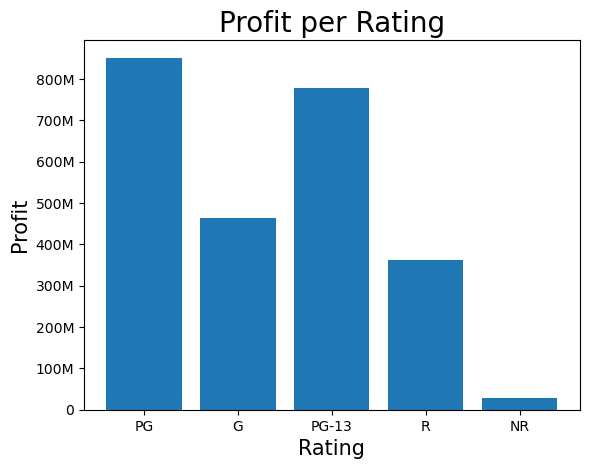

In [16]:
import matplotlib.ticker as mticker
profit_df['certification'] = profit_df['certification'].astype(str)

Rating = profit_df['certification']
Profit = profit_df['Profit']

## Plot the Profit
plt.bar(Rating, Profit)
# Function to format labels in millions and thousands
def millions_thousands_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_thousands_formatter))

# Set labels
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.title('Profit per Rating', fontsize = 20)

# Show the plot
plt.show()

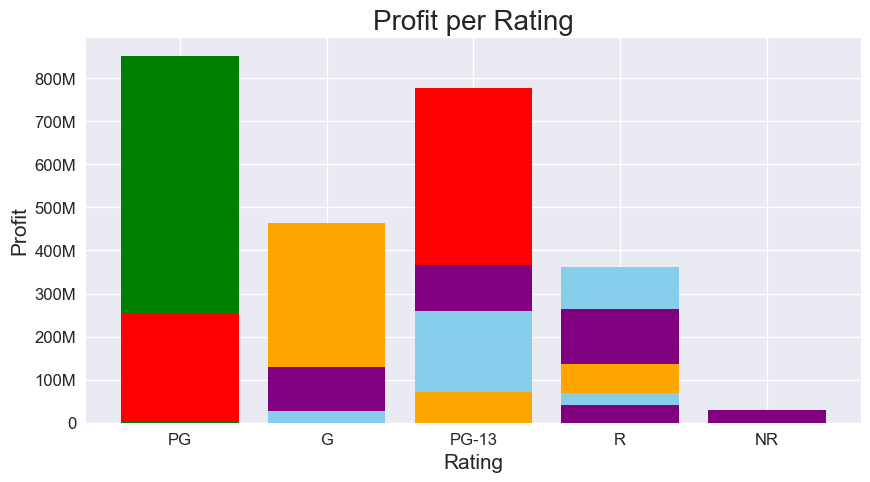

In [24]:
import matplotlib.ticker as mticker
profit_df['certification'] = profit_df['certification'].astype(str)

Rating = profit_df['certification']
Profit = profit_df['Profit']
 
plt.style.use('seaborn')
fig, axes = plt.subplots( figsize = (10,5))
colors = ('skyblue', 'green', 'orange', 'red','purple')

## Plot the Profit
plt.bar(Rating, Profit, color=colors)
# Function to format labels in millions and thousands
def millions_thousands_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.0f}M'
    elif x >= 1e3:
        return f'{x/1e3:.0f}K'
    else:
        return f'{x:.0f}'

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(millions_thousands_formatter))

# Set labels
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Profit', fontsize = 15)
plt.title('Profit per Rating', fontsize = 20)
plt.tick_params(labelsize=12)

# Show the plot
plt.show()

In [ ]:
plt.style.use('seaborn')
fig, axes = plt.subplots( figsize = (15,10))

sns.barplot(data = profit_df, x = 'certification', y= 'Profit', errorbar=None)
plt.xlabel('Rating', fontsize = 20)
plt.ylabel('Profit', fontsize = 20)
plt.title('Profit per Rating', fontsize = 25, fontweight = 'bold')
plt.tick_params(labelsize=15)

plt.show()

In [ ]:
dhrasdfhzs


In [ ]:
fig, axes = plt.subplots( figsize = (25,15))

sns.barplot(x= 'certification', y='Profit', data= profit_df)
plt.xlabel('Rating')
plt.title('Profit per Rating', fontsize = 20, fontweight = 'bold')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### How many movies are there in each of the certification categories (G/PG/PG-13/R)?

In [ ]:
## to order them (optional)
cert_order = ['G','PG','PG-13','R','NR']

In [ ]:
sns.countplot(data=plot_df, x='certification',order=cert_order);

### What is the average revenue per certification category?

In [ ]:
df.groupby(['certification'])['revenue'].apply(lambda x:x.mean())

In [ ]:
rev_cert = df([cert_order])[filter_financial].apply(lambda x:x.mean())
rev_cert

### What is the average budget per certification category?

In [ ]:
df.groupby(['certification'])['budget'].apply(lambda x:x.mean())

In [ ]:
## Save current dataframe to file.
df.to_csv("Data/tmdb_results_combined.csv.gz",compression='gzip',index=False)

In [ ]:
# Open saved file and preview again
final_combo = pd.read_csv("Data/tmdb_results_combined.csv.gz", low_memory = False)
final_combo.head()

In [ ]:
df.info()

## Data was collected from TMBD
https://www.themoviedb.org/about/logos-attribution